In [5]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout,Flatten,Input

In [6]:
#load_data

fm=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fm.load_data()

In [7]:
#الف
len(set(train_labels))

10

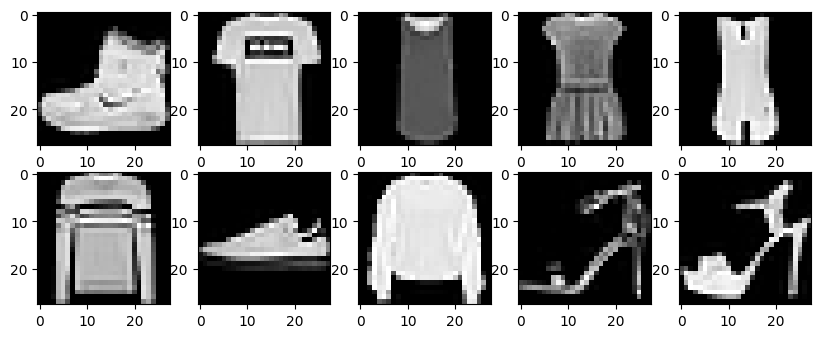

In [8]:
#ب

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

In [9]:
#ج
#normalize
x_train = train_images.astype('float32') / 255.
x_test = test_images.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [23]:
#د
model=Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10)])

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,010 (250.04 KB)

 Trainable params: 64,010 (250.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.fit(x_train, train_labels,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5823 - loss: 1.1467 - val_accuracy: 0.8337 - val_loss: 0.4665
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8077 - loss: 0.5671 - val_accuracy: 0.8378 - val_loss: 0.4411
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8265 - loss: 0.5073 - val_accuracy: 0.8355 - val_loss: 0.4496
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8363 - loss: 0.4763 - val_accuracy: 0.8468 - val_loss: 0.4283
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8485 - loss: 0.4480 - val_accuracy: 0.8547 - val_loss: 0.4205
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8541 - loss: 0.4378 - val_accuracy: 0.8648 - val_loss: 0.3844
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8574 - loss: 0.4373 - val_accuracy: 0.8717 - val_loss: 0.3799
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8584 - loss: 0.4280 - val_accuracy: 0.

In [27]:
print(model.evaluate(x_test,test_labels,verbose=2))

313/313 - 2s - 6ms/step - accuracy: 0.8590 - loss: 0.4811
[0.4811173379421234, 0.859000027179718]
